In [1]:
# Ashraf Dasa (AYDASA@UAB.EDU)

In [2]:
"""
Part A: Logisc Regression with Scikit-learn
- Load the dataset and split it into training and tesng subsets.
"""

'\nPart A: Logisc Regression with Scikit-learn\n- Load the dataset and split it into training and tesng subsets.\n- Use the scikit-learn library to develop a logisc regression model based on the training data. Use only Feature1 and Feature2.\n- Plot the data points and the decision boundary of the model.\n- Evaluate the model on the testng data and report its accuracy.\n'

In [144]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [6]:
data_df = pd.read_csv("data.csv")
data_df_original = data_df
data_df.head()

,Feature1,Feature2,Lable
0,-6,592,0
1,-5,807,0
2,-5,-344,0
3,-5,-126,0
4,-5,243,0


In [7]:
data_df.describe()

,Feature1,Feature2,Lable
count,200.000000,200.000000,200.000000
mean,0.930000,326.810000,0.580000
std,3.660889,286.166245,0.494797
min,-6.000000,-445.000000,0.000000
25%,-2.000000,154.750000,0.000000
50%,0.500000,350.500000,1.000000
75%,4.000000,543.750000,1.000000
max,8.000000,1056.000000,1.000000


In [8]:
# number of nuls per each column
data_df.isnull().sum()

Feature1    0
Feature2    0
Lable       0
dtype: int64

<Axes: >

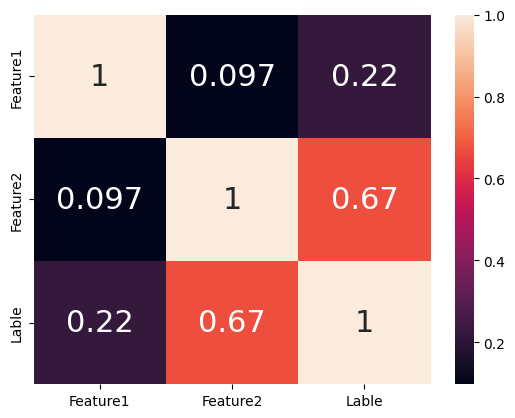

In [13]:
corrMatrix = data_df.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={'size': 22})

array([[<Axes: title={'center': 'Feature1'}>,
        <Axes: title={'center': 'Feature2'}>],
       [<Axes: title={'center': 'Lable'}>, <Axes: >]], dtype=object)

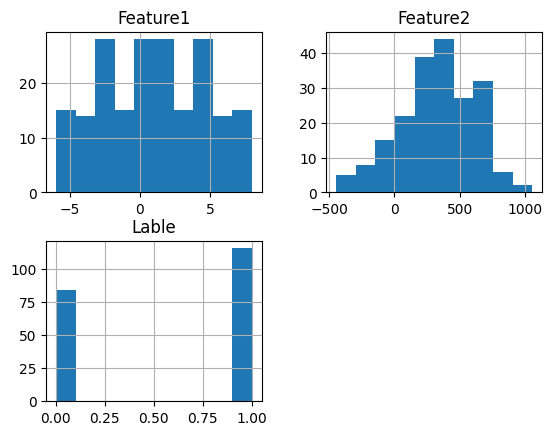

In [14]:
data_df.hist()

<Figure size 800x800 with 0 Axes>

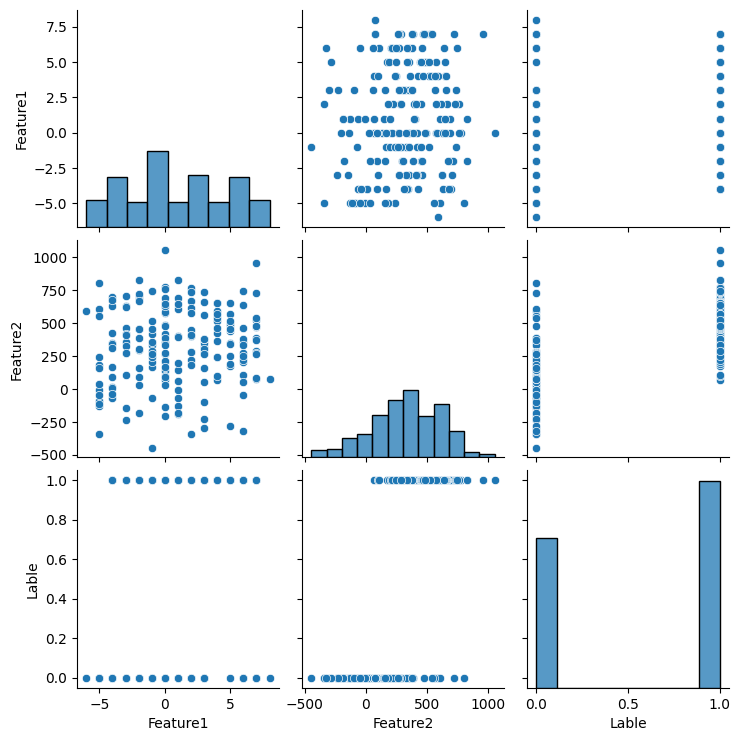

In [15]:
plt.figure(figsize=(8,8))
sns.pairplot(data_df,palette='coolwarm')
plt.show()

In [17]:
# take out the features in an array and take out the lables in another array
features_raw = data_df[data_df.columns[:-1]].values
lables = data_df[data_df.columns[-1]].values

In [20]:
# normalizing features 
scaler = MinMaxScaler() 
scaler.fit(features_raw)
print("the max values per each column: ",scaler.data_max_) 
print("the min values per each column: ",scaler.data_min_)  
print("the max values in features before scaling : ",features_raw.max()) 
print("the min values in features before scaling : ",features_raw.min()) 
features = scaler.transform(features_raw) # transform the features to Max min scaling
print("the max values in features after scaling : ",features.max()) 
print("the min values in features after scaling : ",features.min()) 

the max values per each column:  [   8. 1056.]
the min values per each column:  [  -6. -445.]
the max values in features before scaling :  1056
the min values in features before scaling :  -445
the max values in features after scaling :  1.0
the min values in features after scaling :  0.0


In [21]:
"""
- Use the scikit-learn library to develop a logisc regression model based on the training data. Use only Feature1 and Feature2.
- Plot the data points and the decision boundary of the model.
- Evaluate the model on the testng data and report its accuracy.

"""

'\n- Use the scikit-learn library to develop a logisc regression model based on the training data. Use only Feature1 and Feature2.\n- Plot the data points and the decision boundary of the model.\n- Evaluate the model on the testng data and report its accuracy.\n\n'

In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size=0.2, random_state=42)
y_train2= y_train.reshape(y_train.shape[0],1)
y_test2= y_test.reshape(y_test.shape[0],1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_train reshaped", y_train2.shape)
print("y_test: ", y_test.shape)
print("y_train reshaped", y_test2.shape)

X_train:  (160, 2)
X_test:  (40, 2)
y_train:  (160,)
y_train reshaped (160, 1)
y_test:  (40,)
y_train reshaped (40, 1)


In [28]:
#  Create One-Vs-Rest Logistic Regression
ovr = LogisticRegression(random_state=15, multi_class='ovr', solver='lbfgs')

In [92]:
# Train One-Vs-Rest Logistic Regression
ovr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=15)

In [93]:
# predict 
y_predict =ovr.predict(X_test)
# add up the predictions 
erros = abs(y_test - y_predict).sum()
print("total wrongly predicted vals = " + str(erros))

total wrongly predicted vals = 2


In [97]:
cm_PartA= metrics.confusion_matrix(y_test, y_predict)
print(cm_PartA)


[[12  1]
 [ 1 11]]


In [433]:
"""
Part B: Logis�c Regression Without Scikit-learn 
- Implement logis�c regression from scratch. 
- Use the same training and tes�ng data splits as in Part A. 
- Develop a logis�c regression model based on the training data, using only Feature1 and 
Feature2. 
- Display the cost (loss) as a func�on of itera�ons during the training process. 


- Plot the data points and the decision boundary of your model. 
- Evaluate the model on the tes�ng data and report its accuracy. 

"""

'\n3.\tGradient Descent Implementation:\n•\tImplement the gradient descent algorithm (without the Scikit-Learn library) to find the regression line. Initialize parameters randomly and update them iteratively to minimize the loss function. Record the loss value for each iteration:\n'

In [61]:
def sigmoid(z):
    return 1 /(1+(np.exp(-z)))

In [62]:
def cost(X, y, W, m): # Define the cost function
    return -(1./m) * np.sum(
        (np.multiply(y, np.log(sigmoid(np.dot(W,X))))) +
        (np.multiply((1-y),np.log(1-sigmoid(np.dot(W,X)))))
        )

In [63]:
def logisticRegression(X, y, alpha, iterations):
    previous_cost = 10e4
    cost_list = []
    m = np.size(X, axis=1)
    W = np.random.random((1, X.shape[0]))
    for i in range(iterations):
        W = W - (alpha/m) * np.dot((sigmoid(np.dot(W,X)) - y), X.T)
        cost_ = cost(X, y, W, m)
        cost_list.append([i, cost_])
        if abs(cost_ - previous_cost) < 10e-4 : 
            break
        previous_cost = cost_
    print('iterations=', i, "Error=", abs(cost_ - previous_cost))
    return W, cost_list

In [64]:
X_train_1 = X_train.T
y0 = y_train.copy()
y0[y_train==0]=1
y0[y_train==1]=0
y0[y_train==2]=0
y_train_1 = y0.reshape(1, y0.shape[0])
print(X_train_1.shape, y_train_1.shape)

(2, 160) (1, 160)


In [65]:
W0, cost_list = logisticRegression(X_train_1, y_train_1, 0.1, 300)
print('W0 =', W0)

iterations= 62 Error= 0.0009849568675348586
W0 = [[ 0.06129478 -0.17019308]]


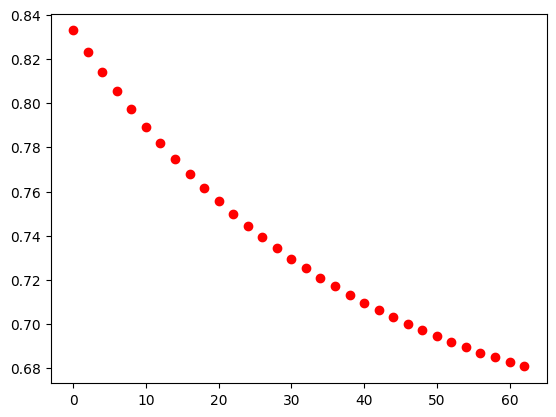

In [66]:
for i in range(0, len(cost_list), 2):
    plt.plot(cost_list[i][0], cost_list[i][1], 'ro')
plt.show()


In [67]:
X_test_1 = X_test.T
y0 = y_test.copy()
y0[y_test==0]=1
y0[y_test==1]=0
y0[y_test==2]=0
y_test_1 = y0.reshape(1, y0.shape[0])
print(X_test_1.shape, y_test_1.shape)
predictions = sigmoid(np.dot(W0, X_test_1))
# print(sigmoid(predictions))
predictions[predictions < 0.5] = 0
predictions[predictions >= 0.5] = 1
print(predictions)

(2, 40) (1, 40)
[[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [68]:
print(sum(y0 == predictions[0]))

29


In [69]:
cm_PartB = metrics.confusion_matrix(y0, predictions[0])
print(cm_PartB)

[[26  0]
 [11  3]]


In [ ]:
"""
Part C: Logisc Regression with Feature Engineering (Scikit-learn) 
- Enhance your dataset by adding new features that are at a higher degree of one of the 
original features (e.g., Feature1^2, Feature1 * Feature2). 
- Use the scikit-learn library to develop a logisc regression model based on the enhanced 
training data. 
- Plot the data points and the decision boundary of the model. 
- Evaluate the model on the tes�ng data and report its accuracy. 

"""

In [84]:
data_df["Feature3"] = data_df["Feature1"] * data_df["Feature1"]
data_df["Feature4"] = data_df["Feature1"] * data_df["Feature2"]
data_df = data_df.loc[:,['Feature1','Feature2','Feature3','Feature4','Lable']]
data_df.head()

,Feature1,Feature2,Feature3,Feature4,Lable
0,-6,592,36,-3552,0
1,-5,807,25,-4035,0
2,-5,-344,25,1720,0
3,-5,-126,25,630,0
4,-5,243,25,-1215,0


In [85]:
# normalizing features 
scaler = MinMaxScaler() 
scaler.fit(features_raw)
print("the max values per each column: ",scaler.data_max_) 
print("the min values per each column: ",scaler.data_min_)  
print("the max values in features before scaling : ",features_raw.max()) 
print("the min values in features before scaling : ",features_raw.min()) 
features = scaler.transform(features_raw) # transform the features to Max min scaling
print("the max values in features after scaling : ",features.max()) 
print("the min values in features after scaling : ",features.min()) 


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size=0.2, random_state=42)
y_train2= y_train.reshape(y_train.shape[0],1)
y_test2= y_test.reshape(y_test.shape[0],1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_train reshaped", y_train2.shape)
print("y_test: ", y_test.shape)
print("y_train reshaped", y_test2.shape)

#  Create One-Vs-Rest Logistic Regression
ovr = LogisticRegression(random_state=15, multi_class='ovr', solver='lbfgs')

# Train One-Vs-Rest Logistic Regression
ovr.fit(X_train, y_train)

# predict 
y_predict =ovr.predict(X_test)
# add up the predictions 
erros = abs(y_test - y_predict).sum()
print("total wrongly predicted vals = " + str(erros))


cm_PartC = metrics.confusion_matrix(y_test, y_predict)
print(cm_PartC)

the max values per each column:  [   8. 1056.]
the min values per each column:  [  -6. -445.]
the max values in features before scaling :  1056
the min values in features before scaling :  -445
the max values in features after scaling :  1.0
the min values in features after scaling :  0.0
X_train:  (160, 2)
X_test:  (40, 2)
y_train:  (160,)
y_train reshaped (160, 1)
y_test:  (40,)
y_train reshaped (40, 1)
total wrongly predicted vals = 6
[[ 9  5]
 [ 1 25]]


In [ ]:
""" 
Part D: Logis�c Regression with Feature Engineering (Without Scikit-learn) 
- Use the enhanced dataset from Part C. 
- Implement logis�c regression from scratch to develop a model based on the enhanced 
training data. 
- Display the cost (loss) as a func�on of itera�ons during the training process. 
- Plot the data points and the decision boundary of your model. 
- Evaluate the model on the tes�ng data and report its accuracy. 

"""

(2, 160) (1, 160)
iterations= 60 Error= 0.0009785141499168981
W0 = [[-0.32322878  0.20074783]]


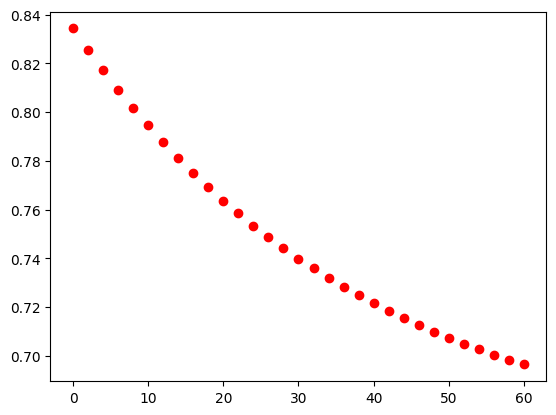

(2, 40) (1, 40)
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
  0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.]]
21
[[18  8]
 [11  3]]


In [86]:
X_train_1 = X_train.T
y0 = y_train.copy()
y0[y_train==0]=1
y0[y_train==1]=0
y0[y_train==2]=0
y_train_1 = y0.reshape(1, y0.shape[0])
print(X_train_1.shape, y_train_1.shape)


W0, cost_list = logisticRegression(X_train_1, y_train_1, 0.1, 300)
print('W0 =', W0)

for i in range(0, len(cost_list), 2):
    plt.plot(cost_list[i][0], cost_list[i][1], 'ro')
plt.show()

X_test_1 = X_test.T
y0 = y_test.copy()
y0[y_test==0]=1
y0[y_test==1]=0
y0[y_test==2]=0
y_test_1 = y0.reshape(1, y0.shape[0])
print(X_test_1.shape, y_test_1.shape)
predictions = sigmoid(np.dot(W0, X_test_1))
# print(sigmoid(predictions))
predictions[predictions < 0.5] = 0
predictions[predictions >= 0.5] = 1
print(predictions)

print(sum(y0 == predictions[0]))

cm_PartD = metrics.confusion_matrix(y0, predictions[0])
print(cm_PartD)

In [ ]:
"""
	Comparison:

    
"""

In [98]:

tn_PartA, fp_PartA, fn_PartA, tp_PartA = cm_PartA.ravel()
tn_PartB, fp_PartB, fn_PartB, tp_PartB = cm_PartB.ravel()
tn_PartC, fp_PartC, fn_PartC, tp_PartC = cm_PartC.ravel()
tn_PartD, fp_PartD, fn_PartD, tp_PartD = cm_PartD.ravel()


In [142]:
matrixConf = []
matrixConf.append(cm_PartA.ravel())
matrixConf.append(cm_PartB.ravel())
matrixConf.append(cm_PartC.ravel())
matrixConf.append(cm_PartD.ravel())
 
conf_df = pd.DataFrame(matrixConf,columns=['True Negative', 'False Positive', 'Flase Negative', 'True Positive'] )
conf_df["method"]=["sklearn","manual","sklearn feature engineering","manual feature engineering"]
conf_df

,True Negative,False Positive,Flase Negative,True Positive,method
0,12,1,1,11,sklearn
1,26,0,11,3,manual
2,9,5,1,25,sklearn feature engineering
3,18,8,11,3,manual feature engineering


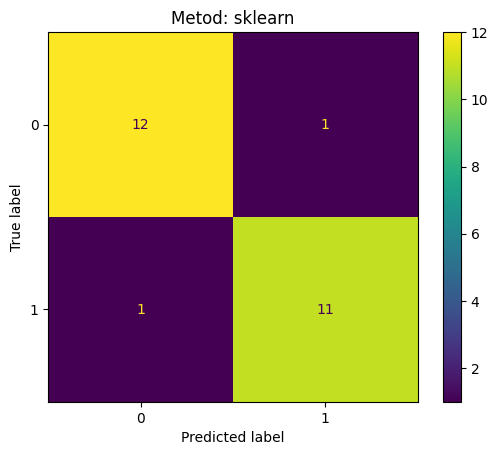

In [150]:
dispA = ConfusionMatrixDisplay(confusion_matrix=cm_PartA)
dispA.plot() 
plt.title('Metod: sklearn')
plt.show()

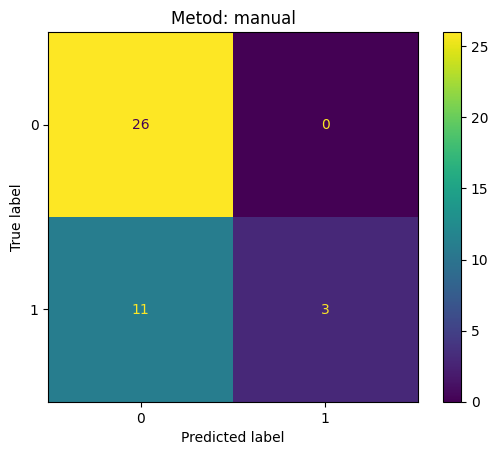

In [152]:
dispB = ConfusionMatrixDisplay(confusion_matrix=cm_PartB)
dispB.plot() 
plt.title('Metod: manual')
plt.show()

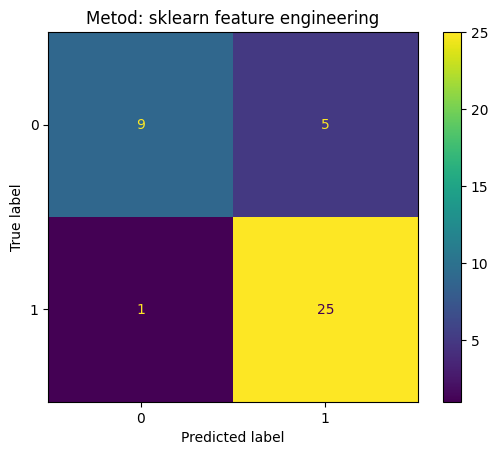

In [153]:
dispC = ConfusionMatrixDisplay(confusion_matrix=cm_PartC)
dispC.plot() 
plt.title('Metod: sklearn feature engineering')
plt.show()

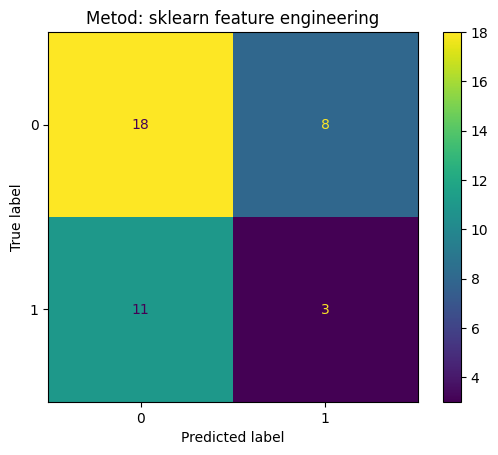

In [154]:
dispD = ConfusionMatrixDisplay(confusion_matrix=cm_PartD)
dispD.plot() 
plt.title('Metod: sklearn feature engineering')
plt.show()